### Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import pickle
import xgboost

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

### Data Collection and Processing

In [ ]:
df = pd.read_csv('/content/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
rowstodrop = df[df['thal']==0]
df.drop(index=[48,281],axis=0,inplace=True)

In [ ]:
df['thal'].value_counts()

2    166
3    117
1     18
Name: thal, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
train_df = df.iloc[:, :-1]
y = df['target'].ravel()

train_df.shape, y.shape

((301, 13), (301,))

USING CORRELATION MATRIX

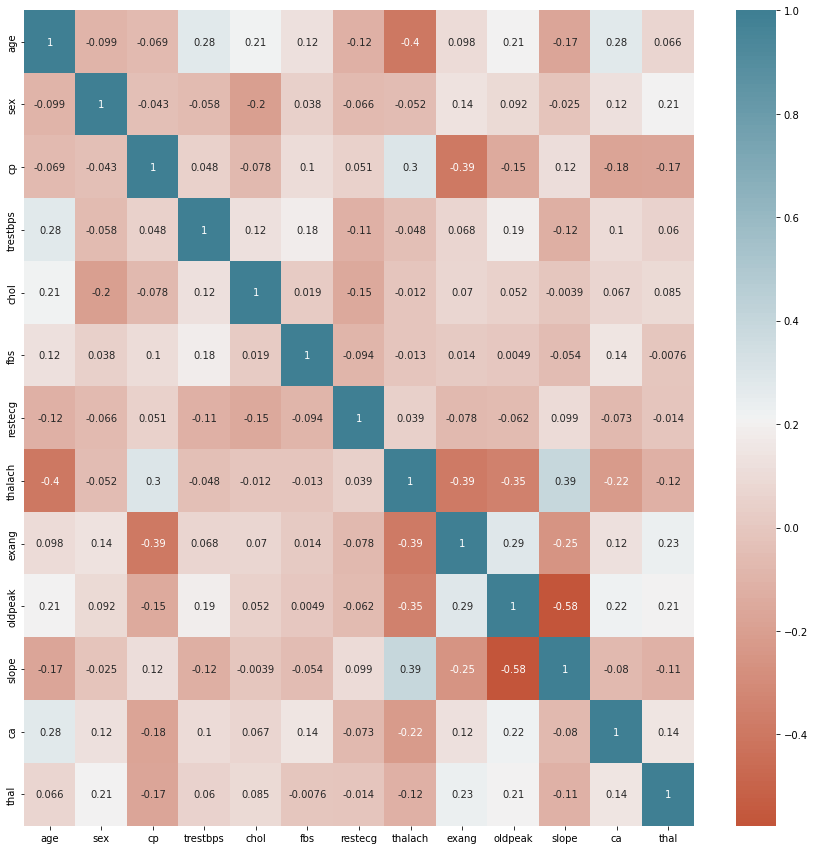

In [ ]:
# correlation matrix

corr_mat = train_df.corr()
plt.figure(figsize=(15, 15))
g = sns.heatmap(corr_mat, annot=True, cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
# find and remove correlated features

threshold = 0.8

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_df.iloc[:,:-1],threshold)

set()

In [ ]:
# Select K best using Chi^2 test

ordered_rank_features = SelectKBest(score_func=chi2, k=13)
ordered_feature = ordered_rank_features.fit(train_df, y)

dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(train_df.columns)

features_rank = pd.concat([dfcolumns, dfscores], axis=1)

features_rank.columns = ['Features','Score']

features_rank.nlargest(13, 'Score')

,Features,Score
7,thalach,194.513757
9,oldpeak,72.012196
11,ca,66.592015
2,cp,61.185148
8,exang,38.015155
4,chol,24.748493
0,age,23.540050
3,trestbps,14.946629
10,slope,9.575327
1,sex,7.245619


USING FEATURE IMPORTANCE - This technique gives you a score for each feature of your data,the higher the score mor relevant it is

USING INFORMATION GAIN

In [ ]:
mutual_info = mutual_info_classif(train_df, y)
mutual_data = pd.Series(mutual_info, index=train_df.columns)
mutual_data.sort_values(ascending=False)

thal        0.128674
cp          0.113946
oldpeak     0.108476
ca          0.095844
exang       0.068914
thalach     0.062071
chol        0.060033
slope       0.059823
restecg     0.033817
age         0.031578
sex         0.005149
trestbps    0.000000
fbs         0.000000
dtype: float64

**FINAL SELECTION**

In [ ]:
final_selected_features = ['ca', 'cp', 'exang', 'thal', 'oldpeak', 'thalach','age']

In [ ]:
X = train_df[final_selected_features]

In [ ]:
X.shape

(301, 7)

### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X1 = df.drop(columns='target', axis=1)
Y1 = df['target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=2)

In [ ]:
model_logReg = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model_logReg.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model_logReg.predict(X_train1)
training_data_accuracy = accuracy_score(X_train_prediction, y_train1)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8625


In [ ]:
# accuracy on test data
X_test_prediction = model_logReg.predict(X_test1)
test_data_accuracy = accuracy_score(X_test_prediction, y_test1)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8524590163934426


### DECISION TREE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.15, random_state=42)

In [ ]:
model_dt=tree.DecisionTreeClassifier()

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_dt.score(X_test,y_test)

0.8478260869565217

### RANDOMFOREST

In [ ]:
# using random forest classifier

rfc = RandomForestClassifier() # ravel : from (n,m) => (n,)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# random forest classifier accuracy:
y_preds = rfc.predict(X_test)
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_preds)*100))

Accuracy : 80.43%


### XGBOOST

In [ ]:
# using xgboost

# hyperparameter optimization

params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

clf = xgboost.XGBClassifier()

random_search = RandomizedSearchCV(
    clf, 
    param_distributions=params, 
    n_iter=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=5, 
    verbose=0
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc')

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.3, max_depth=6, min_child_weight=7)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_xgb))

Accuracy:  0.782608695652174


In [ ]:
# classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.05, max_delta_step=0, max_depth=10,
#               min_child_weight=7, monotone_constraints='()',
#               n_estimators=100, n_jobs=8, num_parallel_tree=1,
#               objective='binary:logistic', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', use_label_encoder=True,
#               validate_parameters=1, verbosity=None)

# classifier.fit(X_train, y_train)

### ADABOOST

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# #Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abc = model_abc.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_abc))

Accuracy: 0.6739130434782609


### SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test result
y_pred_svm = svm_classifier.predict(X_test)
print(y_pred_svm)

[0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1
 0 1 1 1 1 0 0 1 1]


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_svm) 
print("CONFUSION MATRIX\n")
print("\t0\t1")
print("0\t%d\t%d" % (cm[0][0],cm[0][1]))
print("1\t%d\t%d" % (cm[1][0],cm[1][1]))

CONFUSION MATRIX

	0	1
0	14	2
1	3	27


In [ ]:
# Accuracy
print(accuracy_score(y_test, y_pred_svm)*100)

89.13043478260869


### STACKING

In [ ]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=b3c38321d2154b9133e85ee00864c8b8e4218e411cc4942565311eb22d5e4be8
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from vecstack import stacking
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import RFE


In [ ]:
model_1 = LogisticRegression()
model_2 = KNeighborsClassifier()
model_3 = DecisionTreeClassifier()

In [ ]:
from math import sqrt

all_models = [model_1, model_2, model_3]

s_train, s_test = stacking(all_models, X_train,y_train,X_test,regression=True,random_state=None)
 
final_model = model_1

final_model = final_model.fit(s_train, y_train)
 
pred_final = final_model.predict(s_test)
 
print("ROOT MEAN SQUARED ERROR =",sqrt(mean_squared_error(y_test, pred_final)))

print("ACCURACY =",accuracy_score(y_test,pred_final))

ROOT MEAN SQUARED ERROR = 0.29488391230979427
ACCURACY = 0.9130434782608695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
